In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess

from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.util import makeMovie
import cv2

plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定

%matplotlib inline

## ハイドロゲル内部５点計測の比較

In [3]:
data1 = pd.read_csv('/mnt/recordings/AnalysisResult/Seno/experiment/20180927/data/Exp1/S006/dat00001.csv')
data2 = pd.read_csv('/mnt/recordings/AnalysisResult/Seno/experiment/20180927/data/Exp1/S007/dat00001.csv')
data3 = pd.read_csv('/mnt/recordings/AnalysisResult/Seno/experiment/20180927/data/Exp1/S008/dat00001.csv')
data4 = pd.read_csv('/mnt/recordings/AnalysisResult/Seno/experiment/20180927/data/Exp1/S009/dat00001.csv')
data5 = pd.read_csv('/mnt/recordings/AnalysisResult/Seno/experiment/20180927/data/Exp1/S010/dat00001.csv')

In [4]:
x = data1['Sweep #']
y1 = data1['Chan 101 (C)']
y2 = data2['Chan 101 (C)']
y3 = data3['Chan 101 (C)']
y4 = data4['Chan 101 (C)']
y5 = data5['Chan 101 (C)']

/home/tomii/.pyenv/versions/anaconda2-4.4.0/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=10,center=False).mean()
  
/home/tomii/.pyenv/versions/anaconda2-4.4.0/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=10,center=False).mean()
  from ipykernel import kernelapp as app
/home/tomii/.pyenv/versions/anaconda2-4.4.0/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=10,center=False).mean()
  app.launch_new_instance()
/home/tomii/.pyenv/versions/anaconda2-4.4.0/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: pd.ro

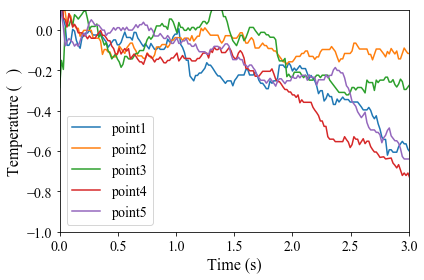

In [11]:
y1_new = y1[211:] - np.average(y1[:211])
y2_new = y2[213:] - np.average(y2[:213])
y3_new = y3[207:] - np.average(y3[:207])
y4_new = y4[203:] - np.average(y4[:203])
y5_new = y5[210:] - np.average(y5[:210])


x1 = np.arange(0.0, len(y1_new))*16/1000
x2 = np.arange(0.0, len(y2_new))*16/1000
x3 = np.arange(0.0, len(y3_new))*16/1000
x4 = np.arange(0.0, len(y4_new))*16/1000
x5 = np.arange(0.0, len(y5_new))*16/1000

plt.plot(x1, pd.rolling_mean(y1_new, 10, 1), label='point1')
plt.plot(x2, pd.rolling_mean(y2_new, 10, 1), label='point2')
plt.plot(x3, pd.rolling_mean(y3_new, 10, 1), label='point3')
plt.plot(x4, pd.rolling_mean(y4_new, 10, 1), label='point4')
plt.plot(x5, pd.rolling_mean(y5_new, 10, 1), label='point5')

plt.legend(fontsize=14)

plt.xlim([0, 3])
plt.ylim([-1, 0.1])

plt.xticks(size=14)
plt.yticks(size=14)

plt.xlabel('Time (s)', size=16)
plt.ylabel('Temperature (   )', size=16)

plt.tight_layout()
# plt.savefig('/mnt/recordings/AnalysisResult/Seno/experiment/20180927/analysis/deep.png', dpi=600, transparent=True)
# plt.close()

## 冷却装置表面の温度変化

In [12]:
data1 = pd.read_csv('/mnt/recordings/AnalysisResult/Seno/experiment/20180927/data/Exp2/S001/dat00001.csv')
data2 = pd.read_csv('/mnt/recordings/AnalysisResult/Seno/experiment/20180927/data/Exp2/S002/dat00001.csv')
data3 = pd.read_csv('/mnt/recordings/AnalysisResult/Seno/experiment/20180927/data/Exp2/S003/dat00001.csv')
data4 = pd.read_csv('/mnt/recordings/AnalysisResult/Seno/experiment/20180927/data/Exp2/S004/dat00001.csv')
data5 = pd.read_csv('/mnt/recordings/AnalysisResult/Seno/experiment/20180927/data/Exp2/S005/dat00001.csv')

In [13]:
x = data1['Sweep #']
y1 = data1['Chan 101 (C)']
y2 = data2['Chan 101 (C)']
y3 = data3['Chan 101 (C)']
y4 = data4['Chan 101 (C)']
y5 = data5['Chan 101 (C)']

In [18]:
y1_new = y1[202:] - np.average(y1[:202])
y2_new = y2[208:] - np.average(y2[:208])
y3_new = y3[195:] - np.average(y3[:195])
y4_new = y4[194:] - np.average(y4[:194])
y5_new = y5[211:] - np.average(y5[:211])


x1 = np.arange(0.0, len(y1_new))*16/1000
x2 = np.arange(0.0, len(y2_new))*16/1000
x3 = np.arange(0.0, len(y3_new))*16/1000
x4 = np.arange(0.0, len(y4_new))*16/1000
x5 = np.arange(0.0, len(y5_new))*16/1000

plt.plot(x1, pd.rolling_mean(y1_new, 10, 1), label='point1')
plt.plot(x2, pd.rolling_mean(y2_new, 10, 1), label='point2')
plt.plot(x3, pd.rolling_mean(y3_new, 10, 1), label='point3')
plt.plot(x4, pd.rolling_mean(y4_new, 10, 1), label='point4')
plt.plot(x5, pd.rolling_mean(y5_new, 10, 1), label='point5')

plt.legend(fontsize=14)

plt.xlim([0, 1.5])
plt.ylim([-5, 1])

plt.xticks(size=14)
plt.yticks(size=14)

plt.xlabel('Time (s)', size=16)
plt.ylabel('Temperature (   )', size=16)

plt.tight_layout()
plt.savefig('/mnt/recordings/AnalysisResult/Seno/experiment/20180927/analysis/surface.png', dpi=600, transparent=True)
plt.close()

/home/tomii/.pyenv/versions/anaconda2-4.4.0/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=10,center=False).mean()
  
/home/tomii/.pyenv/versions/anaconda2-4.4.0/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=10,center=False).mean()
  from ipykernel import kernelapp as app
/home/tomii/.pyenv/versions/anaconda2-4.4.0/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=10,center=False).mean()
  app.launch_new_instance()
/home/tomii/.pyenv/versions/anaconda2-4.4.0/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: pd.ro